# 2024 Day 6

https://adventofcode.com/2024/day/6

https://adventofcode.com/2024/day/6/input

In [1]:
import re
from dataclasses import dataclass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def parse_input(s):
    return np.array([[c for c in line.strip()] for line in s])

In [3]:
data = parse_input("""....#.....
.........#
..........
..#.......
.......#..
..........
.#..^.....
........#.
#.........
......#...""".split('\n'))
data

array([['.', '.', '.', '.', '#', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '#'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '#', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '#', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '#', '.', '.', '^', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '#', '.'],
       ['#', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '#', '.', '.', '.']], dtype='<U1')

In [4]:
data = parse_input(open("input-06.txt").readlines())
data

array([['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '#', '.'],
       ...,
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '#', '.'],
       ['.', '.', '.', ..., '.', '.', '.']], dtype='<U1')

## Part 1

In [5]:
directions = {
    '^': (-1, 0),
    '>': (0, 1),
    'v': (1, 0),
    '<': (0, -1),
}
rotations = {
    '^': '>',
    '>': 'v',
    'v': '<',
    '<': '^'
}

In [6]:
def find_start(data):
    start = np.where(data == '^')
    return int(start[0][0]), int(start[1][0])

In [7]:
def in_bounds(data, loc):
    nrow, ncol = data.shape
    return 0 <= loc[0] < nrow and 0 <= loc[1] < ncol

In [8]:
@dataclass
class Traj:
    loc: tuple[int, int]
    dir: str

class Path:
    def __init__(self, data):
        self.data = data.copy()
        self.start = find_start(data)
        self.history = [Traj(self.start, '^')]
        self.corners = []
        
        self.outcome = None
        while self.outcome is None:
            self.step()
        
    def step(self):
        prev = self.history[-1]
        loc, dir = prev.loc, prev.dir
        delta = directions[dir]
        next_loc = loc[0] + delta[0], loc[1] + delta[1]
        next_loc_in_bounds = in_bounds(self.data, next_loc)
        
        if next_loc_in_bounds and self.data[next_loc] == '#':
            # check for loop
            if dir == '>':
                if loc in self.corners:
                    self.outcome = 'loop'
                    return
                else:
                    self.corners.append(loc)
            
            # turn right
            next_dir = rotations[dir]
            traj = Traj(loc, next_dir)
            self.history.append(traj)
        elif next_loc_in_bounds:
            # take a step
            traj = Traj(next_loc, dir)
            self.history.append(traj)
        else:
            # exit
            self.outcome = 'exit'
            
    def distinct_locs(self):
        return set(traj.loc for traj in self.history)

In [9]:
main_path = Path(data)

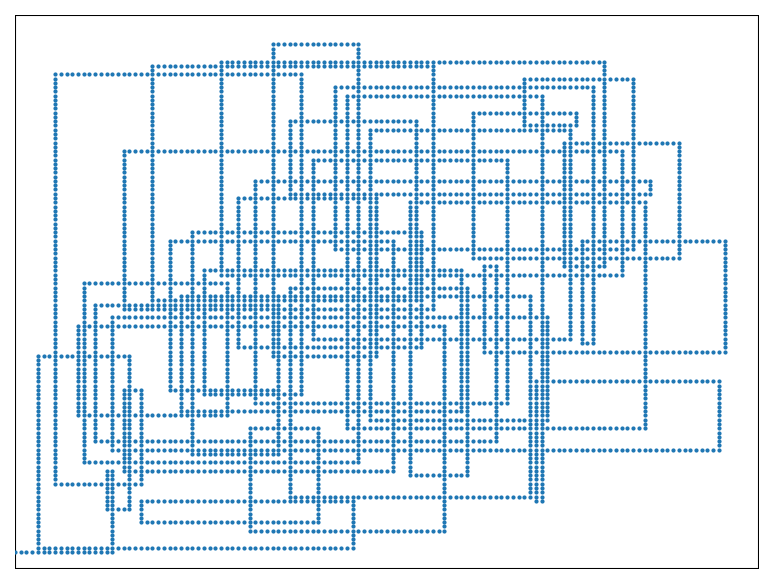

In [10]:
fig, ax = plt.subplots(dpi=150)
nrow, ncol = data.shape
ax.add_artist(plt.Rectangle((0, 0), ncol, nrow, color='k', fill=False))
ax.plot(*np.transpose(list(main_path.distinct_locs())), '.', ms=2)
ax.set(xticks=[], yticks=[], xlim=(0, ncol), ylim=(0, nrow));
ax.axis('off');

In [11]:
len(main_path.distinct_locs())

4454

## Part 2

In [12]:
from tqdm import tqdm

In [13]:
num_loops = 0

for loc in tqdm(main_path.distinct_locs()):
    if loc == main_path.start:
        continue
        
    test_data = data.copy()
    test_data[loc] = '#'
    test_path = Path(test_data)
    if test_path.outcome == 'loop':
        num_loops += 1
        
num_loops

100%|███████████████████████████████████████████████████████████████████████████████████████| 4454/4454 [00:18<00:00, 243.08it/s]


1503